In [153]:
import pandas as pd 
import sklearn
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 12, 4
#import warnings
#warnings.filterwarnings('ignore')

## Load dataframes

In [154]:
train = pd.read_json('./../Data/train.json')
train.shape

(49352, 15)

In [155]:
test = pd.read_json('./../Data/test.json')

In [156]:
test.shape

(74659, 14)

In [157]:
train.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue


In [158]:
test.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street


### Combine train and test for EDA

In [159]:
rental = train.append(test)
rental.shape

(124011, 15)

In [160]:
rental.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue


In [161]:
rental.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

In [162]:
rental.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

interest_level is the target variable. it is interesting that there are many kinds of features - numerical, datetime, photos, textual. 

### Create a new column with datatype datetime from "Created" 

In [163]:
rental['created_datetime'] = pd.to_datetime(rental['created'],infer_datetime_format=True)

In [164]:
rental[['created', 'created_datetime']].dtypes

created                     object
created_datetime    datetime64[ns]
dtype: object

In [165]:
rental[['created', 'created_datetime']].head(5)

,created,created_datetime
10,2016-06-24 07:54:24,2016-06-24 07:54:24
10000,2016-06-12 12:19:27,2016-06-12 12:19:27
100004,2016-04-17 03:26:41,2016-04-17 03:26:41
100007,2016-04-18 02:22:02,2016-04-18 02:22:02
100013,2016-04-28 01:32:41,2016-04-28 01:32:41


### Check for null values

In [166]:
rental.isnull().sum().sort_values(ascending=False)

interest_level      74659
created_datetime        0
street_address          0
price                   0
photos                  0
manager_id              0
longitude               0
listing_id              0
latitude                0
features                0
display_address         0
description             0
created                 0
building_id             0
bedrooms                0
bathrooms               0
dtype: int64

test data has no interest level information since its the target variable! the rest have no n/a values. 

### Explore features

#### Column name: features

In [167]:
rental['features'].head(10).values

array([[],
       [u'Doorman', u'Elevator', u'Fitness Center', u'Cats Allowed', u'Dogs Allowed'],
       [u'Laundry In Building', u'Dishwasher', u'Hardwood Floors', u'Pets Allowed Case by Case'],
       [u'Hardwood Floors', u'No Fee'], [u'Pre-War'], [],
       [u'prewar', u'elevator', u'Dogs Allowed', u'Cats Allowed', u'LOWRISE', u'SIMPLEX', u'HARDWOOD', u'No Fee'],
       [u'Doorman', u'Elevator', u'Pre-War', u'Terrace', u'Laundry in Unit', u'Dishwasher', u'Hardwood Floors', u'Outdoor Space'],
       [u'Cats Allowed', u'Dogs Allowed', u'Elevator', u'Laundry In Building'],
       [u'Dishwasher', u'Hardwood Floors']], dtype=object)

The features column has lots of categories ... These categories are surely important!

In [168]:
flattened_features_col = [item for sublist in list(rental.features) for item in sublist]

In [169]:
from collections import Counter
Counter(flattened_features_col).most_common() #most_common sorts Counter by value

[(u'Elevator', 64956),
 (u'Cats Allowed', 59194),
 (u'Hardwood Floors', 59071),
 (u'Dogs Allowed', 55207),
 (u'Doorman', 52328),
 (u'Dishwasher', 51065),
 (u'No Fee', 45418),
 (u'Laundry in Building', 40956),
 (u'Fitness Center', 33407),
 (u'Pre-War', 23108),
 (u'Laundry in Unit', 21880),
 (u'Roof Deck', 16442),
 (u'Outdoor Space', 13404),
 (u'Dining Room', 12809),
 (u'High Speed Internet', 10622),
 (u'Balcony', 7639),
 (u'Swimming Pool', 7152),
 (u'Laundry In Building', 6503),
 (u'New Construction', 6366),
 (u'Terrace', 5650),
 (u'Exclusive', 5470),
 (u'Loft', 5284),
 (u'Garden/Patio', 4894),
 (u'Wheelchair Access', 3393),
 (u'Common Outdoor Space', 3294),
 (u'HARDWOOD', 2347),
 (u'SIMPLEX', 2327),
 (u'Fireplace', 2278),
 (u'prewar', 2198),
 (u'LOWRISE', 2026),
 (u'Laundry In Unit', 1869),
 (u'Garage', 1863),
 (u'Reduced Fee', 1816),
 (u'Laundry Room', 1777),
 (u'Furnished', 1672),
 (u'Multi-Level', 1546),
 (u'Private Outdoor Space', 1325),
 (u'Prewar', 1235),
 (u'Parking Space', 1045

Looks like many of the words are duplicate ... Hardwood Floor and HARDWOOD & Laundry in Building and Laundry in Unit and Laundry In Building. We will need to do some text preprocessing and then should be able to utilize the word counts.

#### Column: description

In [170]:
rental['description'].head(3).values

array([ u"A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted ",
       u'        ',
       u'Top Top West Village location, beautiful Pre-war building with laundry in the basement and live in super!<br/><br/>Apartment features a large bedroom with closet. Separate living room, kitchen features granite tops, dishwasher and microwave included, marble bathroom and hardwood flooring. Building is very well maintained and conveniently located near A,C,E,L,1,2,3 tra

We should be able to use word counts or tf-idf of the description to use in our predictions. We could also extract sentiments and be able to use in our predictions. 

#### Column: display address

In [171]:
rental['display_address'].head(10)

10        Metropolitan Avenue
10000         Columbus Avenue
100004            W 13 Street
100007       East 49th Street
100013      West 143rd Street
100014       West 18th Street
100016      West 107th Street
100020       West 21st Street
100026       Hamilton Terrace
100027             522 E 11th
Name: display_address, dtype: object

In [172]:
rental['display_address'].unique().shape

(16068,)

In [173]:
rental['display_address'].value_counts().head(10)

Broadway             1163
East 34th Street      868
Wall Street           853
Second Avenue         838
West 37th Street      722
First Avenue          678
West Street           649
John Street           585
Gold Street           572
Washington Street     553
Name: display_address, dtype: int64

We should be able to use the word counts of display address as well. Looks like most listings are listed in Broadway.

#### Column: street_address

In [174]:
rental['street_address'].head(10)

10        792 Metropolitan Avenue
10000         808 Columbus Avenue
100004            241 W 13 Street
100007       333 East 49th Street
100013      500 West 143rd Street
100014       350 West 18th Street
100016      210 West 107th Street
100020       155 West 21st Street
100026        63 Hamilton Terrace
100027                 522 E 11th
Name: street_address, dtype: object

Since we have simplified display address already, exact street address might not be as important! We will find out ...

#### Column: building_id

In [175]:
rental['building_id'].unique().shape

(11635,)

In [176]:
rental['building_id'].value_counts().head(10)

0                                   20664
96274288c84ddd7d5c5d8e425ee75027      705
11e1dec9d14b1a9e528386a2504b3afc      546
bb8658a3e432fb62a440615333376345      522
80a120d6bc3aba97f40fee8c2204524b      510
ce6d18bf3238e668b2bf23f4110b7b67      459
f68bf347f99df026f4faad43cc604048      457
c94301249b8c09429d329864d58e5b82      410
ea9045106c4e1fe52853b6af941f1c69      397
128d4af0683efc5e1eded8dc8044d5e3      385
Name: building_id, dtype: int64

Many buldings have 0 for building_id. I suppose those are missing building_id.

In [177]:
rental[rental.building_id=='0'].head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,created_datetime
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,2016-04-28 01:32:41
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",low,40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th,2016-04-02 02:58:15


#### Target Column: interest_level 

In [178]:
rental['interest_level'].head(5)

10        medium
10000        low
100004      high
100007       low
100013       low
Name: interest_level, dtype: object

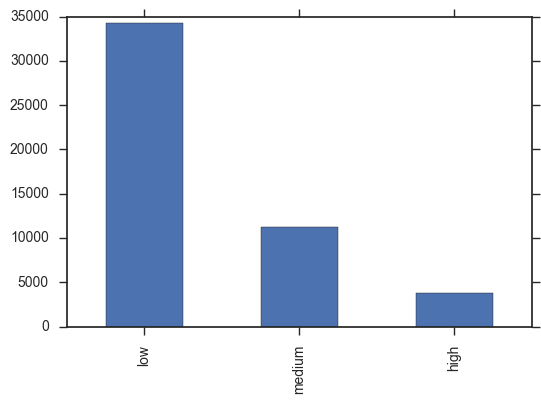

In [179]:
rental['interest_level'].value_counts().plot(kind='bar')

There are many more listings with low interest level than medium and high. This is an imbalanced class and we might need to sample the data to create a balanced class later.

#### Column: bedrooms

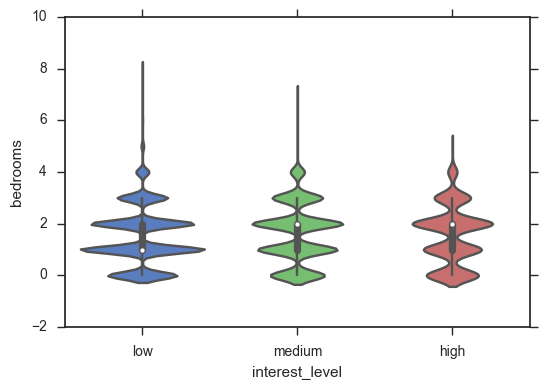

In [180]:
ax = sns.violinplot(x="interest_level", y="bedrooms", \
                    data=rental, palette="muted", order=["low", "medium", "high"], inner="box")

Looks like mean bedrooms is higher for medium and high interest_levels compared to low 

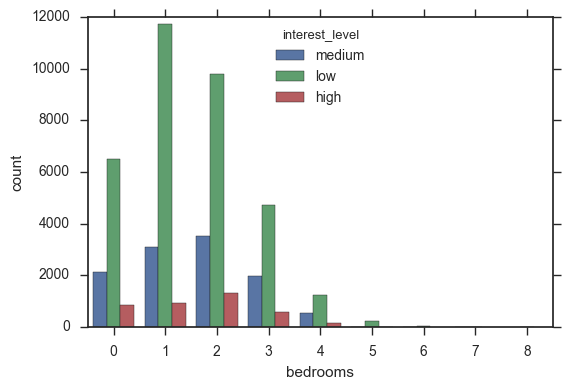

In [181]:
sns.countplot(x='bedrooms', hue='interest_level', data=rental)

In [182]:
rental[rental.interest_level=="low"]['bedrooms'].max()

8

#### Column: bathrooms

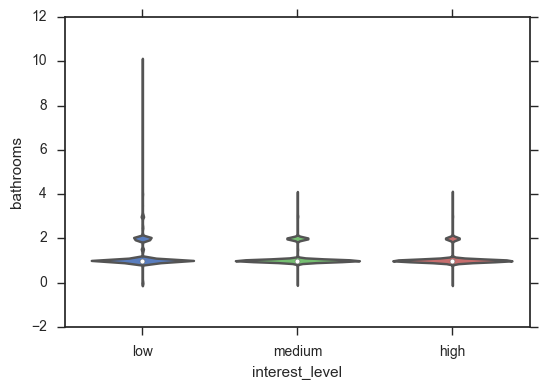

In [183]:
ax = sns.violinplot(x="interest_level", y="bathrooms", \
                    data=rental, palette="muted", order=["low", "medium", "high"], inner="box")

Bathrooms doesn't seem to matter ...

In [184]:
rental['bathrooms'].value_counts(0)

1.0      99086
2.0      19230
3.0       1861
1.5       1642
0.0        787
2.5        702
4.0        364
3.5        164
4.5         83
5.0         60
5.5         12
6.0         11
6.5          3
20.0         2
7.5          1
7.0          1
10.0         1
112.0        1
Name: bathrooms, dtype: int64

There are some houses with really high number of bathrooms like 112! That has to be a mistake and will need fixing! 

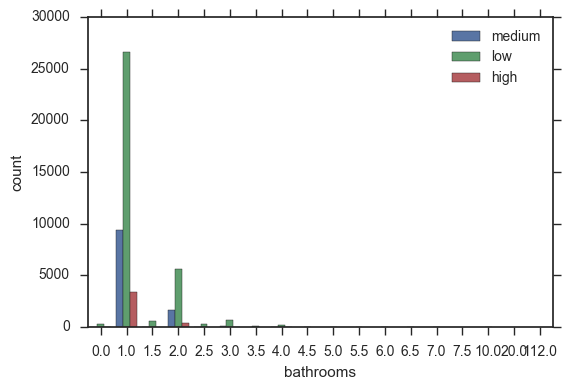

In [185]:
sns.countplot(x='bathrooms', hue='interest_level', data=rental)
plt.legend(loc="upper right")

#### Lets look into just the numerical columns

In [186]:
rental.select_dtypes(include=['float64', 'int64']).columns

Index([u'bathrooms', u'bedrooms', u'latitude', u'listing_id', u'longitude',
       u'price'],
      dtype='object')

In [187]:
numerical_cols = [x for x in rental.select_dtypes(include=['float64', 'int64']).columns if x not in ['listing_id']]
numerical_cols

[u'bathrooms', u'bedrooms', u'latitude', u'longitude', u'price']

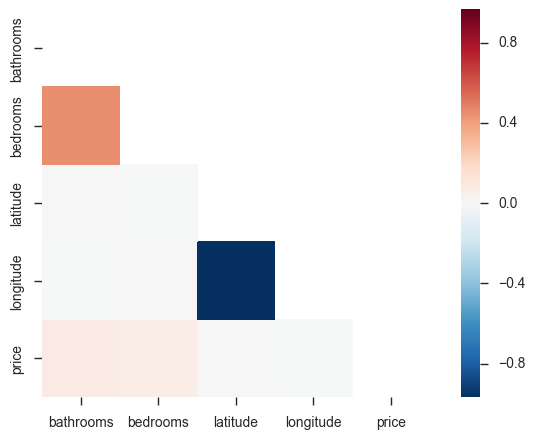

In [188]:
corrmat = rental[numerical_cols].corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 5))
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True)
plt.show()

bedrooms and bathrooms are positively correlated which makes sense! 
Price is not strongly correlated with bedrooms or bathrooms which is interesting!
Latitude and Longitude are very negatively correlated which is interesting! Probably doesn't mean much

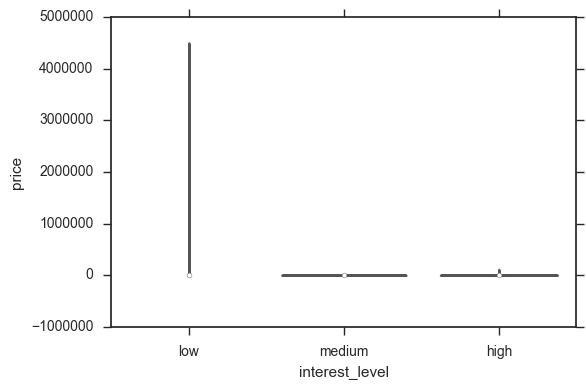

In [189]:
ax = sns.violinplot(x="interest_level", y="price", \
                    data=rental, palette="muted", order=["low", "medium", "high"], inner="box")

Looks like we have some outliers in prices that we will remove before running ML models.

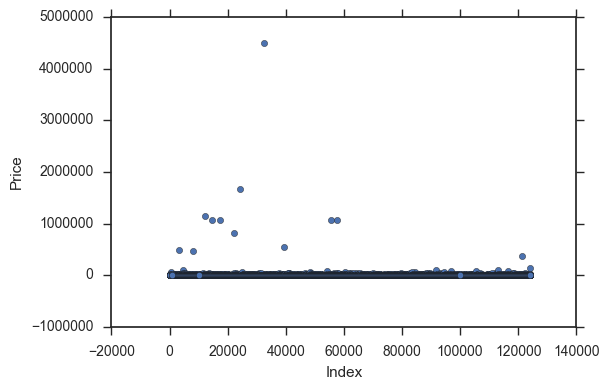

In [190]:
plt.scatter(x=rental.index, y=rental.price)
plt.xlabel("Index")
plt.ylabel("Price")

In [191]:
ulimit = np.percentile(train.price.values, 99) # Take only the 99 percentile
ulimit

13000.0

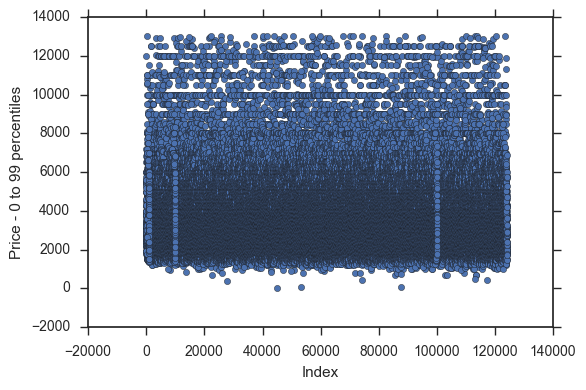

In [192]:
plt.scatter(x=rental[rental.price<ulimit].index, y=rental[rental.price<ulimit].price)
plt.xlabel("Index")
plt.ylabel("Price - 0 to 99 percentiles")

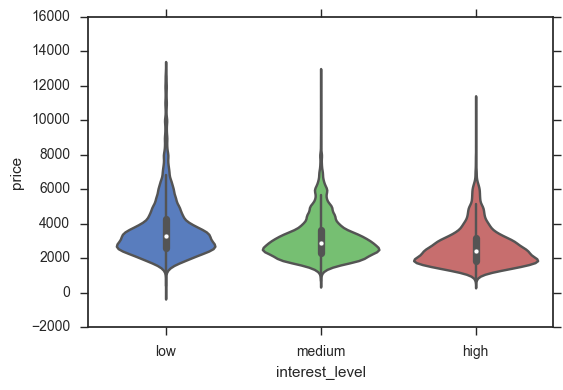

In [193]:
ax = sns.violinplot(x="interest_level", y="price", \
                    data=rental[rental.price<ulimit], palette="muted", order=["low", "medium", "high"], inner="box")

At higher interest level, medium price is lower.

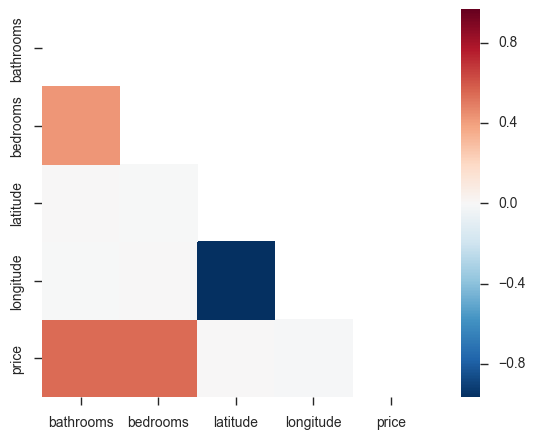

In [194]:
corrmat = rental[rental.price<ulimit][numerical_cols].corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 5))
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True)
plt.show()

Once you remove outlier prices, bedrooms and bathrooms are both positively correlated with price. 

In [195]:
cols = [x for x in numerical_cols+['interest_level'] if x not in ['latitude', 'longitude']]

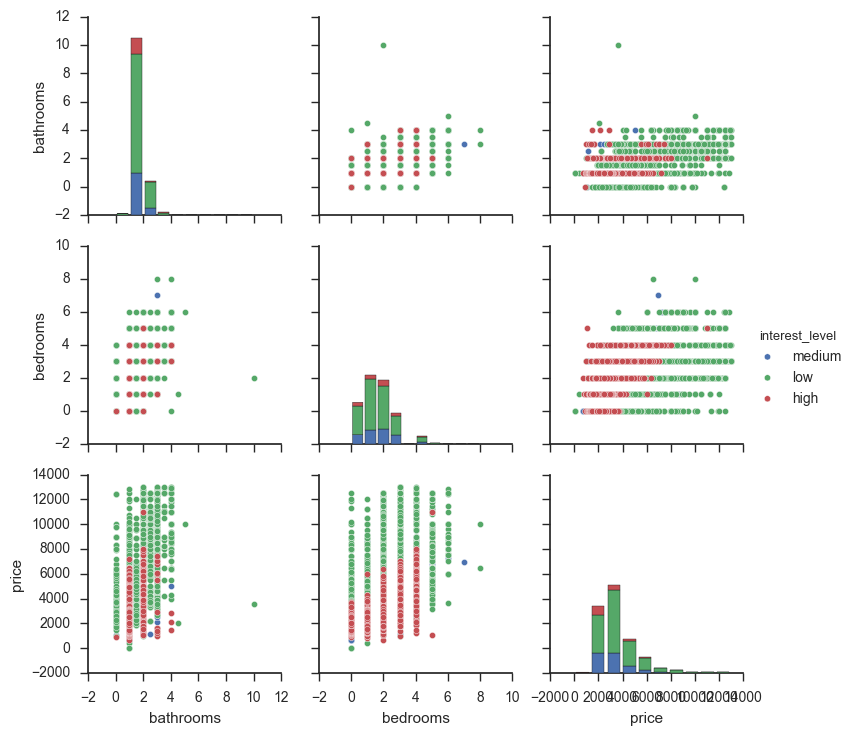

In [196]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(rental[rental.price<ulimit][cols], hue="interest_level")

(array([ -2000.,      0.,   2000.,   4000.,   6000.,   8000.,  10000.,
         12000.,  14000.]), <a list of 9 Text xticklabel objects>)

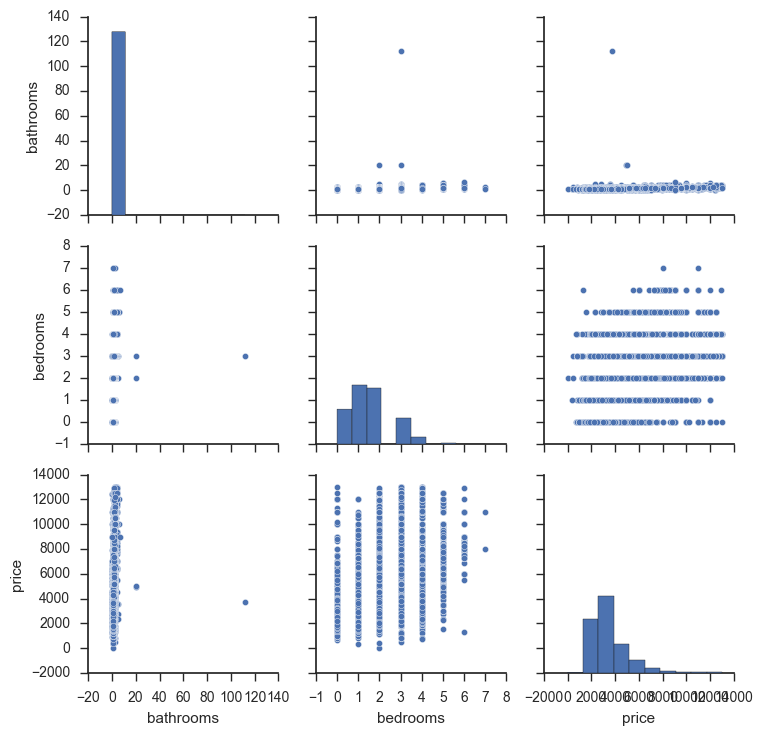

In [197]:
cols = [x for x in cols if x != 'interest_level']
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(test[test.price<ulimit][cols])

#### Column: manager_id

In [198]:
rental['manager_id'].value_counts().head(5)

e6472c7237327dd3903b3d6f6a94515a    6387
6e5c10246156ae5bdcd9b487ca99d96a    1683
8f5a9c893f6d602f4953fcc0b8e6e9b4    1011
cb87dadbca78fad02b388dc9e8f25a5b     971
62b685cc0d876c3a1a51d63a0d6a8082     956
Name: manager_id, dtype: int64

In [199]:
rental['manager_id'].unique().shape

(4399,)

### Outliers analysis

In [200]:
ulimit

13000.0

Lets look at the houses that are priced above 1 million dollar

In [201]:
rental[rental.price>1000000]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,created_datetime
12168,1.0,2,5d3525a5085445e7fcd64a53aac3cb0a,2016-06-24 05:02:58,,West 116th Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",low,40.8011,7208794,-73.9480,d1737922fe92ccb0dc37ba85589e6415,[],1150000,40 West 116th Street,2016-06-24 05:02:58
32611,1.0,2,cd25bbea2af848ebe9821da820b725da,2016-06-24 05:02:11,,Hudson Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",low,40.7299,7208764,-74.0071,d1737922fe92ccb0dc37ba85589e6415,[],4490000,421 Hudson Street,2016-06-24 05:02:11
55437,1.0,1,37385c8a58176b529964083315c28e32,2016-05-14 05:21:28,,West 57th Street,"[Doorman, Cats Allowed, Dogs Allowed]",low,40.7676,7013217,-73.9844,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],1070000,333 West 57th Street,2016-05-14 05:21:28
57803,1.0,1,37385c8a58176b529964083315c28e32,2016-05-19 02:37:06,This 1 Bedroom apartment is located on a prime...,West 57th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7676,7036279,-73.9844,18133bc914e6faf6f8cc1bf29d66fc0d,[https://photos.renthop.com/2/7036279_924b52f0...,1070000,333 West 57th Street,2016-05-19 02:37:06
14605,1.0,1,37385c8a58176b529964083315c28e32,2016-06-22 02:39:31,This 1 Bedroom apartment is located on a prime...,West 57th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",NaN,40.7676,7197770,-73.9844,d8e89ad5c34d3aa9aeb38c8b2cd85351,[https://photos.renthop.com/2/7197770_4a82bc56...,1070000,333 West 57th Street,2016-06-22 02:39:31
17293,1.0,1,37385c8a58176b529964083315c28e32,2016-06-12 06:25:52,,West 57th Street,"[Doorman, Cats Allowed, Dogs Allowed]",NaN,40.7676,7147232,-73.9844,7f6d00384a19d9bdd15ff36ddbad699a,[],1070000,333 West 57th Street,2016-06-12 06:25:52
24251,1.0,2,f2a6c777d522638fa05445062854bf6c,2016-06-24 04:59:31,,East 84th Street,"[Elevator, Cats Allowed, Dogs Allowed, Exclusive]",NaN,40.7773,7208670,-73.9547,d1737922fe92ccb0dc37ba85589e6415,[],1675000,200 East 84th Street,2016-06-24 04:59:31


Many of the ones with very high prices have the word "Exclusive" in the features column in the test set. 
Most of them also have Doorman. 
Bedrooms and bathrooms count seems completely normal. 
Many of the listings are in 333 West 57th Street

In [202]:
rental[rental.street_address=="333 West 57th Street"]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,created_datetime
55437,1.0,1,37385c8a58176b529964083315c28e32,2016-05-14 05:21:28,,West 57th Street,"[Doorman, Cats Allowed, Dogs Allowed]",low,40.7676,7013217,-73.9844,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],1070000,333 West 57th Street,2016-05-14 05:21:28
57803,1.0,1,37385c8a58176b529964083315c28e32,2016-05-19 02:37:06,This 1 Bedroom apartment is located on a prime...,West 57th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7676,7036279,-73.9844,18133bc914e6faf6f8cc1bf29d66fc0d,[https://photos.renthop.com/2/7036279_924b52f0...,1070000,333 West 57th Street,2016-05-19 02:37:06
14605,1.0,1,37385c8a58176b529964083315c28e32,2016-06-22 02:39:31,This 1 Bedroom apartment is located on a prime...,West 57th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",NaN,40.7676,7197770,-73.9844,d8e89ad5c34d3aa9aeb38c8b2cd85351,[https://photos.renthop.com/2/7197770_4a82bc56...,1070000,333 West 57th Street,2016-06-22 02:39:31
17293,1.0,1,37385c8a58176b529964083315c28e32,2016-06-12 06:25:52,,West 57th Street,"[Doorman, Cats Allowed, Dogs Allowed]",NaN,40.7676,7147232,-73.9844,7f6d00384a19d9bdd15ff36ddbad699a,[],1070000,333 West 57th Street,2016-06-12 06:25:52


The apartments in 333 West 57th Street are all listed at 1.07m and have low interests. We should make note of these and exclude from models and simply predict as low interest.

In [203]:
rental[rental.price>100000].street_address.value_counts()

333 West 57th Street    4
372 De Kalb Avenue      1
40 West 116th Street    1
200 East 84th Street    1
209 East 56th Street    1
25 BROAD ST.            1
57-25 Van Horn St       1
101 Lafayette Avenue    1
233 East 70th Street    1
144 Duane Street        1
421 Hudson Street       1
Name: street_address, dtype: int64

In [204]:
rental[rental.price>100000].interest_level.value_counts()

low     5
high    1
Name: interest_level, dtype: int64

In [205]:
rental[(rental.price>100000) & (rental.interest_level == "high")]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,created_datetime
4620,1.0,0,c0d27c9422c375c651baa7b61e4a9dca,2016-06-07 17:35:10,The BEST DEAL!!!!!\r\rBeautiful Studio in a ni...,Van Horn St and 57th ave,"[Elevator, Laundry In Building, Balcony]",high,40.7323,7122037,-73.8761,3d7ef07518d7564ab1c55f6fa7c80527,[https://photos.renthop.com/2/7122037_531f0877...,111111,57-25 Van Horn St,2016-06-07 17:35:10


In [206]:
rental[(rental.price>100000) & (rental.interest_level == "high")].description.values

array([ u'The BEST DEAL!!!!!\r\rBeautiful Studio in a nice elevator building.\rOnly $1,025.\r\r5 mins to either Grand Ave or Woodhaven subway station(M,R) by Walk.\rVery safe and nice are close to Queens mall(Macys, BestBuy, Costo, Centry 21, Etc)\r\rIt has a BALCONY.\rYour annual reported income must be over at least 40 times the rent (no cash income considered) and a good credit. \r\rMOVE in possible from Aug 1st, 2016\r\rThe Pics on the Ad is different unit in the same building but pretty much same style.\r\rThank you.\r'], dtype=object)

In [207]:
rental[(rental.price>100000) & (rental.interest_level == "high")].photos.values

array([ [u'https://photos.renthop.com/2/7122037_531f0877fc55c00bb33746f2905a2a29.jpg']], dtype=object)

Difficult to say why the interest level is high for this one. Price is expensive, it is a studio, and looking at the picture, it looks really old and not very nice! This one will be kicked out from the dataset.

In [208]:
rental[rental.manager_id=="3d7ef07518d7564ab1c55f6fa7c80527"]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,created_datetime
4620,1.0,0,c0d27c9422c375c651baa7b61e4a9dca,2016-06-07 17:35:10,The BEST DEAL!!!!!\r\rBeautiful Studio in a ni...,Van Horn St and 57th ave,"[Elevator, Laundry In Building, Balcony]",high,40.7323,7122037,-73.8761,3d7ef07518d7564ab1c55f6fa7c80527,[https://photos.renthop.com/2/7122037_531f0877...,111111,57-25 Van Horn St,2016-06-07 17:35:10
51212,1.0,2,49c00ffa0117e4a6f8f03880fcf2ac14,2016-05-16 15:22:40,$2200\r\ra Beautiful True 2Br in Astoria(LIC)....,Beautiful 2BR on 32nd Street/Btwn 35th-36th Ave,[],low,40.7575,7020126,-73.9282,3d7ef07518d7564ab1c55f6fa7c80527,[https://photos.renthop.com/2/7020126_40157f4d...,2200,35-12 32nd Street,2016-05-16 15:22:40
70076,1.0,2,49c00ffa0117e4a6f8f03880fcf2ac14,2016-05-23 14:50:55,$2200\r\r a Beautiful True 2Br in Astoria(LIC)...,Beautiful 2Br on 32nd Street and btwn 35th-36t...,[],low,40.7575,7055937,-73.9282,3d7ef07518d7564ab1c55f6fa7c80527,[https://photos.renthop.com/2/7055937_c79dcdd5...,2200,35-12 32nd Street,2016-05-23 14:50:55
76958,1.0,2,49c00ffa0117e4a6f8f03880fcf2ac14,2016-05-23 14:57:39,$2200\r\ra Beautiful RENOVATED True 2Br in Ast...,Renovated 2Br on 32nd street and btwn 35th-36t...,[],NaN,40.7575,7055942,-73.9282,3d7ef07518d7564ab1c55f6fa7c80527,[https://photos.renthop.com/2/7055942_5d7ef77e...,2200,35-12 32nd street,2016-05-23 14:57:39
95923,1.0,2,93b48133b8a3ec69aee32834afef0283,2016-04-06 00:00:14,$1800 ONLY in Maspeth.\r\rA Beautiful Large 2b...,56th Ave/61st St in Maspeth,[],NaN,40.7250,6827483,-73.9036,3d7ef07518d7564ab1c55f6fa7c80527,[https://photos.renthop.com/2/6827483_fbd5fdb4...,1800,60-36 56th Ave,2016-04-06 00:00:14


In [209]:
rental['bathrooms'].value_counts()

1.0      99086
2.0      19230
3.0       1861
1.5       1642
0.0        787
2.5        702
4.0        364
3.5        164
4.5         83
5.0         60
5.5         12
6.0         11
6.5          3
20.0         2
7.5          1
7.0          1
10.0         1
112.0        1
Name: bathrooms, dtype: int64

In [210]:
rental[rental.bathrooms==112]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,created_datetime
17808,112.0,3,33fa7be8ea2ffc6353af117cab78f569,2016-06-07 05:22:55,"This is a pretty, charming, prime location 3 b...",East 75th Street,[Hardwood Floors],NaN,40.7693,7120577,-73.9529,3e1edc05ca35eaecc90766629d22d078,[https://photos.renthop.com/2/7120577_dea70af4...,3700,433 East 75th Street,2016-06-07 05:22:55


In [211]:
rental[rental.bathrooms==112].description.values

array([ u'This is a pretty, charming, prime location 3 bedrooms apartment, with large windows, hardwood floors living room and bedrooms. The kitchen has an ample breakfast bar, all in white appliances and enough amount of cabinets. The bathrooms owns a very neat and clean aspect with all in white ceramic tiles and floor. One of a kind opportunity.  Call us for a viewing.AH<br /><br /><p><a  website_redacted '], dtype=object)

112 bathrooms can't be true so we will replace it with median number of bathrooms for 3 bedrooms apartments later.

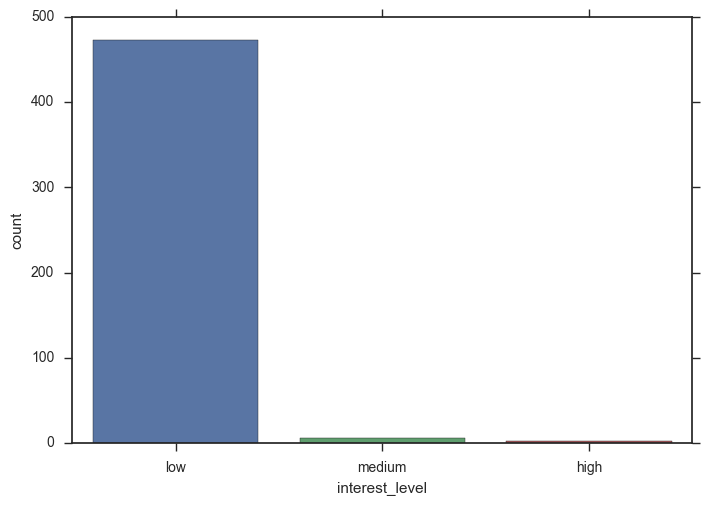

In [212]:
sns.countplot(x='interest_level', data=rental[rental.price>ulimit])

In [213]:
rental[rental.price>ulimit].interest_level.value_counts(0)

low       473
medium      6
high        2
Name: interest_level, dtype: int64

Majority of the outliers have interest level low!

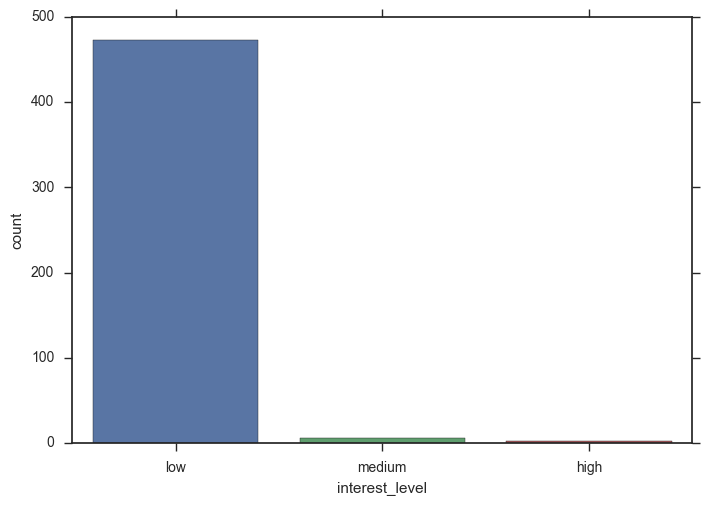

In [214]:
sns.countplot(x='interest_level', data=train[train.price>ulimit])

#### Column: latitude and longitude

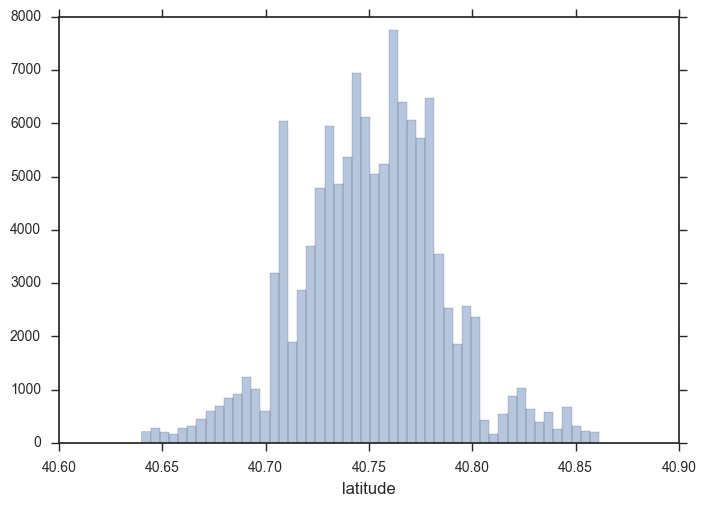

In [215]:
llimit = np.percentile(rental.latitude.values, 1)
ulimit = np.percentile(rental.latitude.values, 99)
idx = rental[(rental.latitude>llimit) & (rental.latitude<ulimit)].index
sns.distplot(rental.loc[idx].latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.show()

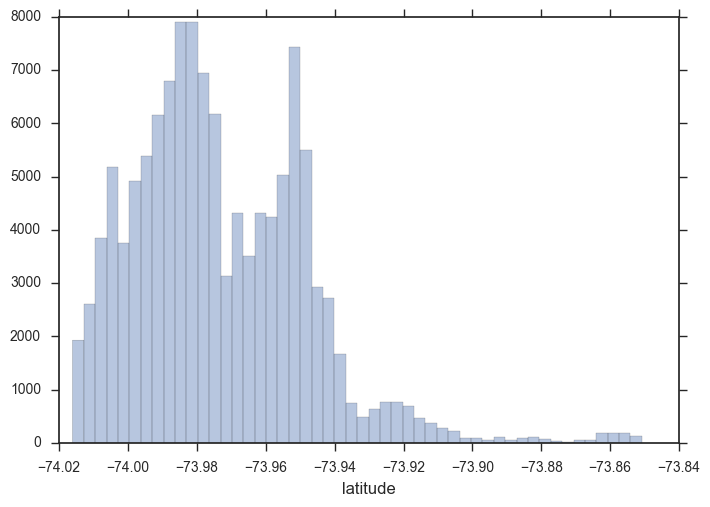

In [216]:
llimit = np.percentile(rental.longitude.values, 1)
ulimit = np.percentile(rental.longitude.values, 99)
idx = rental[(rental.longitude>llimit) & (rental.longitude<ulimit)].index
sns.distplot(rental.loc[idx].longitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.show()

1-99 percentiles of listings are in NYC.

#### Lets look into when the listings were created

In [217]:
rental['created_date'] = rental.created_datetime.dt.date
rental['created_hour'] = rental.created_datetime.dt.hour

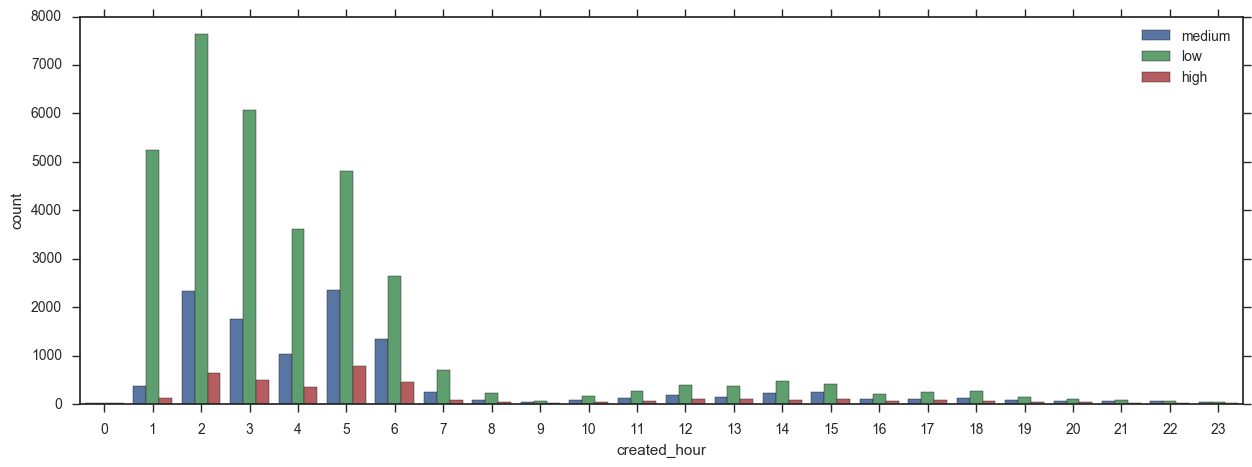

In [218]:
plt.figure(figsize=(15,5))
sns.countplot(x='created_hour', hue='interest_level', data=rental)
plt.legend(loc="upper right")

Looks like most of the listings are created in the early mornings. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

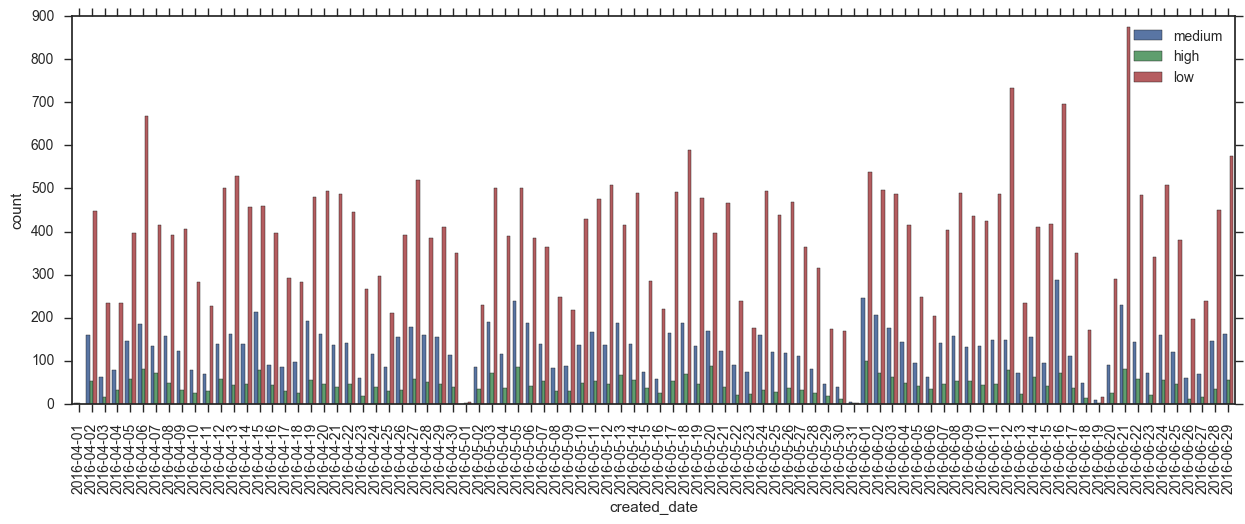

In [219]:
plt.figure(figsize=(15,5))
sns.countplot(x='created_date', hue='interest_level', data=rental.sort_values(by="created_date"))
plt.legend(loc="upper right")
plt.xticks(rotation='vertical') #displays date values vertically so they are readable!

Date range goes from April 1st 2016 to June 29 2016! 